In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
file = 'Book1.csv' 

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-9',
 'confidence': 0.40675735780021943,
 'language': 'Turkish'}

In [4]:
ten = pd.read_csv(file,encoding='ISO-8859-9')
ten.head()

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,TB/S,Sets,Set W-L,S W%,Gms,Game W-L,G W%,Time/Mt,Min/Set,Sec/Pt
0,1,Novak DjokovicÊ[SRB],108.0,96-12,88.90%,68.30%,67.80%,725.0,8.60%,285.0,...,13.40%,305.0,241-64,79.00%,2713.0,1644-1069,60.60%,2:01,42.9,44.9
1,2,Daniil MedvedevÊ[RUS],113.0,90-23,79.60%,68.70%,67.30%,1016.0,12.60%,326.0,...,11.40%,299.0,218-81,72.90%,2720.0,1589-1131,58.40%,1:44,39.3,41.7
2,3,Alexander ZverevÊ[GER],112.0,86-26,76.80%,68.10%,67.80%,1123.0,13.00%,489.0,...,17.30%,313.0,224-89,71.60%,2890.0,1618-1272,56.00%,1:57,41.8,43.1
3,4,Rafael NadalÊ[ESP],63.0,51-12,81.00%,67.40%,67.60%,273.0,5.60%,145.0,...,13.10%,168.0,129-39,76.80%,1557.0,946-611,60.80%,2:09,48.5,50.0
4,5,Stefanos TsitsipasÊ[GRE],116.0,83-33,71.60%,69.10%,68.10%,781.0,8.90%,241.0,...,17.50%,309.0,208-101,67.30%,2877.0,1621-1256,56.30%,1:54,42.7,44.0


In [5]:
ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 62 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        51 non-null     object 
 1   Player    50 non-null     object 
 2   M         50 non-null     float64
 3   M W-L     50 non-null     object 
 4   M W%      50 non-null     object 
 5   SPW       50 non-null     object 
 6   SPW-InP   50 non-null     object 
 7   Aces      50 non-null     float64
 8   Ace%      50 non-null     object 
 9   DFs       50 non-null     float64
 10  DF%       50 non-null     object 
 11  DF/2s     50 non-null     object 
 12  1stIn     50 non-null     object 
 13  1st%      50 non-null     object 
 14  2nd%      50 non-null     object 
 15  2%-InP    50 non-null     object 
 16  Hld%      50 non-null     object 
 17  Pts/SG    50 non-null     float64
 18  PtsL/SG   50 non-null     float64
 19  RPW       50 non-null     object 
 20  RPW-InP   50 non-null     object 


In [6]:
#To remove the NA values
ten = ten.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(ten))

The total number of data-points after removing the rows with missing values are: 50


In [7]:
ten.describe()

,M,Aces,DFs,Pts/SG,PtsL/SG,Pts/RG,PtsW/RG,MdOppRk,MnOppRk,BPConv,...,BPvs/M,Bkn/S,Bkn/M,DR,Points,TBs,Sets,Gms,Min/Set,Sec/Pt
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,75.900000,490.260000,217.300000,6.330000,2.258000,6.472000,2.468000,53.130000,76.14400,230.860000,...,6.4580,0.913400,2.418000,1.078200,12113.240000,33.980000,200.620000,1896.420000,43.302000,42.936000
std,25.523299,323.079431,112.168105,0.198206,0.261932,0.167868,0.228964,12.678042,21.29579,95.457012,...,1.2164,0.215715,0.560863,0.096546,3905.103247,13.004693,66.474758,619.370717,2.365784,2.127925
min,13.000000,22.000000,24.000000,5.900000,1.700000,5.900000,1.700000,26.000000,46.50000,41.000000,...,3.9000,0.450000,1.200000,0.930000,2119.000000,2.000000,35.000000,314.000000,38.600000,37.700000
25%,65.500000,255.000000,146.500000,6.200000,2.025000,6.400000,2.400000,45.875000,62.55000,191.000000,...,5.5250,0.787500,2.100000,1.030000,10120.000000,26.250000,169.500000,1609.500000,41.800000,41.625000
50%,77.500000,353.000000,203.000000,6.300000,2.300000,6.500000,2.500000,51.000000,72.95000,224.000000,...,6.6000,0.920000,2.400000,1.065000,12409.000000,34.000000,202.500000,1934.500000,43.050000,43.050000
75%,88.000000,753.000000,262.000000,6.500000,2.475000,6.600000,2.600000,59.750000,82.60000,266.000000,...,7.5000,1.082500,2.875000,1.107500,14462.750000,44.500000,231.750000,2277.250000,45.075000,44.200000
max,126.000000,1168.000000,586.000000,6.800000,2.900000,7.000000,2.900000,81.000000,143.60000,448.000000,...,9.1000,1.270000,3.400000,1.360000,19527.000000,55.000000,324.000000,3094.000000,48.500000,50.000000


In [8]:
tenserve = ten.drop(list(ten)[18:61], axis=1)

In [9]:
tenserve.head()

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt
0,1,Novak DjokovicÊ[SRB],108.0,96-12,88.90%,68.30%,67.80%,725.0,8.60%,285.0,3.40%,9.60%,64.60%,76.20%,53.70%,59.40%,87.00%,6.1,44.9
1,2,Daniil MedvedevÊ[RUS],113.0,90-23,79.60%,68.70%,67.30%,1016.0,12.60%,326.0,4.00%,10.60%,61.80%,78.30%,53.10%,59.40%,86.80%,5.9,41.7
2,3,Alexander ZverevÊ[GER],112.0,86-26,76.80%,68.10%,67.80%,1123.0,13.00%,489.0,5.60%,17.50%,67.80%,77.20%,49.00%,59.40%,84.80%,6.0,43.1
3,4,Rafael NadalÊ[ESP],63.0,51-12,81.00%,67.40%,67.60%,273.0,5.60%,145.0,3.00%,8.30%,64.10%,73.70%,56.00%,61.00%,85.60%,6.1,50.0
4,5,Stefanos TsitsipasÊ[GRE],116.0,83-33,71.60%,69.10%,68.10%,781.0,8.90%,241.0,2.70%,7.50%,63.60%,76.10%,56.80%,61.50%,87.80%,6.0,44.0


In [10]:
tenserve["Rk"] = pd.to_numeric(tenserve["Rk"])
tenserve["M"] = pd.to_numeric(tenserve["M"])

In [11]:
tenserve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       50 non-null     int64  
 1   Player   50 non-null     object 
 2   M        50 non-null     float64
 3   M W-L    50 non-null     object 
 4   M W%     50 non-null     object 
 5   SPW      50 non-null     object 
 6   SPW-InP  50 non-null     object 
 7   Aces     50 non-null     float64
 8   Ace%     50 non-null     object 
 9   DFs      50 non-null     float64
 10  DF%      50 non-null     object 
 11  DF/2s    50 non-null     object 
 12  1stIn    50 non-null     object 
 13  1st%     50 non-null     object 
 14  2nd%     50 non-null     object 
 15  2%-InP   50 non-null     object 
 16  Hld%     50 non-null     object 
 17  Pts/SG   50 non-null     float64
 18  Sec/Pt   50 non-null     float64
dtypes: float64(5), int64(1), object(13)
memory usage: 7.8+ KB


In [12]:
#Get list of categorical variables
s = (tenserve.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Player', 'M W-L', 'M W%', 'SPW', 'SPW-InP', 'Ace%', 'DF%', 'DF/2s', '1stIn', '1st%', '2nd%', '2%-InP', 'Hld%']


In [13]:
tenserve['SPW'] = tenserve['SPW'].str.rstrip('%').astype('float') / 100.0
tenserve['SPW-InP'] = tenserve['SPW-InP'].str.rstrip('%').astype('float') / 100.0
tenserve['Ace%'] = tenserve['Ace%'].str.rstrip('%').astype('float') / 100.0
tenserve['DF%'] = tenserve['DF%'].str.rstrip('%').astype('float') / 100.0
tenserve['DF/2s'] = tenserve['DF/2s'].str.rstrip('%').astype('float') / 100.0
tenserve['1st%'] = tenserve['1st%'].str.rstrip('%').astype('float') / 100.0
tenserve['2nd%'] = tenserve['2nd%'].str.rstrip('%').astype('float') / 100.0
tenserve['2%-InP'] = tenserve['2%-InP'].str.rstrip('%').astype('float') / 100.0
tenserve['Hld%'] = tenserve['Hld%'].str.rstrip('%').astype('float') / 100.0
tenserve['1stIn'] = tenserve['1stIn'].str.rstrip('%').astype('float') / 100.0
tenserve['M W%'] = tenserve['M W%'].str.rstrip('%').astype('float') / 100.0

In [14]:
tenserve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       50 non-null     int64  
 1   Player   50 non-null     object 
 2   M        50 non-null     float64
 3   M W-L    50 non-null     object 
 4   M W%     50 non-null     float64
 5   SPW      50 non-null     float64
 6   SPW-InP  50 non-null     float64
 7   Aces     50 non-null     float64
 8   Ace%     50 non-null     float64
 9   DFs      50 non-null     float64
 10  DF%      50 non-null     float64
 11  DF/2s    50 non-null     float64
 12  1stIn    50 non-null     float64
 13  1st%     50 non-null     float64
 14  2nd%     50 non-null     float64
 15  2%-InP   50 non-null     float64
 16  Hld%     50 non-null     float64
 17  Pts/SG   50 non-null     float64
 18  Sec/Pt   50 non-null     float64
dtypes: float64(16), int64(1), object(2)
memory usage: 7.8+ KB


In [15]:
tenserve[['Wins', 'Losses']] = tenserve['M W-L'].str.split('-', expand=True)

In [16]:
tenserve = tenserve.drop(['M W-L'], axis = 1)

In [17]:
tenserve["Wins"] = pd.to_numeric(tenserve["Wins"])
tenserve["Losses"] = pd.to_numeric(tenserve["Losses"])

In [18]:
tenserve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       50 non-null     int64  
 1   Player   50 non-null     object 
 2   M        50 non-null     float64
 3   M W%     50 non-null     float64
 4   SPW      50 non-null     float64
 5   SPW-InP  50 non-null     float64
 6   Aces     50 non-null     float64
 7   Ace%     50 non-null     float64
 8   DFs      50 non-null     float64
 9   DF%      50 non-null     float64
 10  DF/2s    50 non-null     float64
 11  1stIn    50 non-null     float64
 12  1st%     50 non-null     float64
 13  2nd%     50 non-null     float64
 14  2%-InP   50 non-null     float64
 15  Hld%     50 non-null     float64
 16  Pts/SG   50 non-null     float64
 17  Sec/Pt   50 non-null     float64
 18  Wins     50 non-null     int64  
 19  Losses   50 non-null     int64  
dtypes: float64(16), int64(3), object(1)
memory usage: 8.2+ K

In [19]:
tenserve.describe()

,Rk,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,75.900000,0.600960,0.644360,0.638980,490.260000,0.078900,217.300000,0.035500,0.09570,0.630540,0.721220,0.513520,0.56806,0.806340,6.330000,42.936000,46.540000,29.360000
std,14.57738,25.523299,0.101962,0.030296,0.021438,323.079431,0.046014,112.168105,0.013233,0.03297,0.029456,0.040139,0.024111,0.02105,0.049183,0.198206,2.127925,20.330142,10.358394
min,1.00000,13.000000,0.357000,0.575000,0.587000,22.000000,0.018000,24.000000,0.012000,0.03600,0.566000,0.625000,0.458000,0.52900,0.699000,5.900000,37.700000,5.000000,4.000000
25%,13.25000,65.500000,0.543500,0.624250,0.626000,255.000000,0.049750,146.500000,0.028000,0.07400,0.610500,0.689000,0.499000,0.55450,0.772250,6.200000,41.625000,35.500000,23.250000
50%,25.50000,77.500000,0.586000,0.640500,0.636000,353.000000,0.065000,203.000000,0.031000,0.08850,0.632000,0.720500,0.515000,0.56400,0.806000,6.300000,43.050000,43.500000,33.000000
75%,37.75000,88.000000,0.649000,0.665000,0.652750,753.000000,0.103000,262.000000,0.041500,0.11525,0.654000,0.759500,0.528000,0.57575,0.837750,6.500000,44.200000,51.750000,37.000000
max,50.00000,126.000000,0.889000,0.713000,0.681000,1168.000000,0.239000,586.000000,0.079000,0.18500,0.697000,0.797000,0.568000,0.61500,0.915000,6.800000,50.000000,96.000000,47.000000


In [20]:
tenserve = tenserve[(tenserve["M"]>50)]

In [21]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])


<AxesSubplot:>

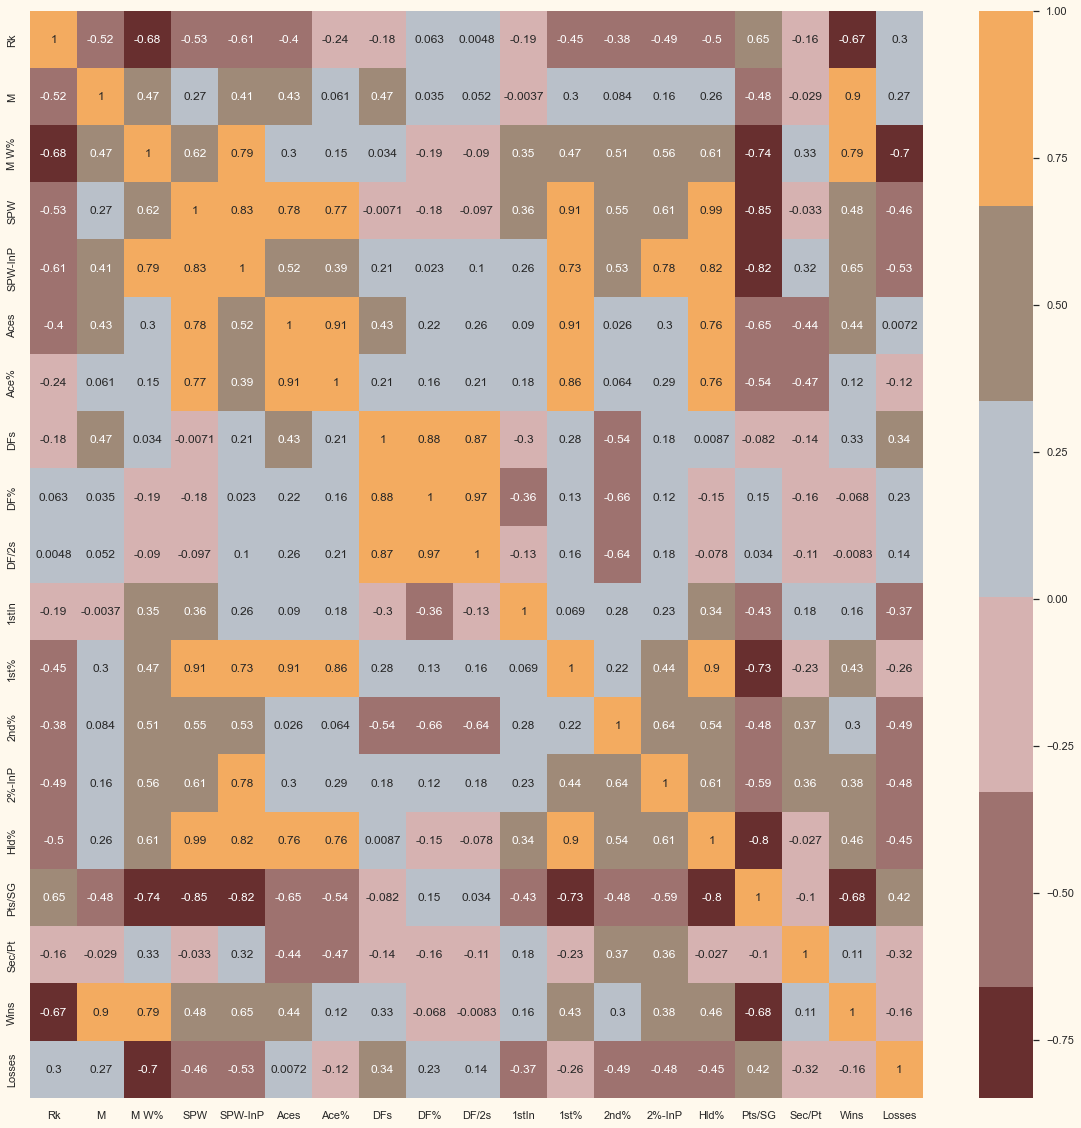

In [22]:
corrmat= tenserve.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [23]:
#Creating a copy of data
ds = tenserve.copy()
# creating a subset of Player Names
cols_del = ['Player']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [24]:
scaled_ds.head()

,Rk,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses
0,-1.628824,1.458904,2.955240,1.277759,1.893107,0.623233,0.091441,0.490307,-0.180815,-0.044887,0.599528,0.996391,0.978915,1.181216,1.305191,-1.165549,0.911548,2.639491,-2.584980
1,-1.556467,1.741151,1.991875,1.416311,1.641958,1.570673,0.953184,0.898712,0.288609,0.270727,-0.349474,1.549617,0.720802,1.181216,1.262738,-2.246986,-0.640023,2.292189,-1.145649
2,-1.484111,1.684702,1.701830,1.208483,1.893107,1.919044,1.039359,2.522371,1.540406,2.448469,1.684103,1.259832,-1.042965,1.181216,0.838209,-1.706267,0.038789,2.060655,-0.753104
3,-1.411754,-1.081320,2.136898,0.966016,1.792647,-0.848390,-0.554867,-0.904246,-0.493764,-0.455187,0.430064,0.337789,1.968345,1.967237,1.008020,-1.165549,3.384364,0.034730,-2.584980
4,-1.339398,1.910499,1.163174,1.554863,2.043797,0.805558,0.156071,0.052019,-0.728476,-0.707678,0.260599,0.970047,2.312495,2.212869,1.475002,-1.706267,0.475169,1.887004,0.162833


In [25]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,45.0,-5.921189e-17,2.880612,-4.729222,-2.151172,-0.184497,1.562414,5.597511
col2,45.0,-4.934325e-17,2.035050,-3.797096,-1.184760,-0.279155,0.907452,7.737130
col3,45.0,5.736152e-17,1.549886,-3.048218,-0.956537,-0.240698,0.919892,4.617166


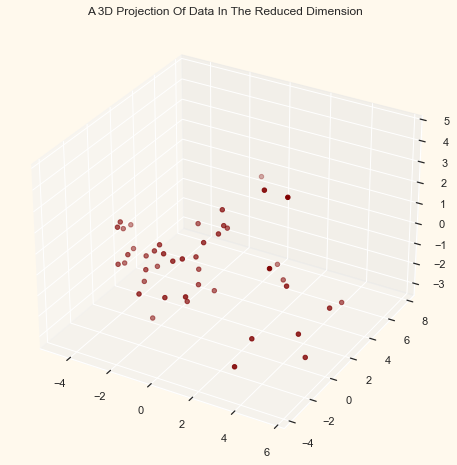

In [26]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


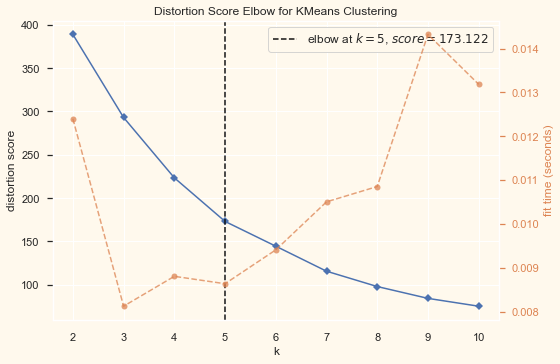

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [28]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
tenserve["Clusters"]= yhat_AC

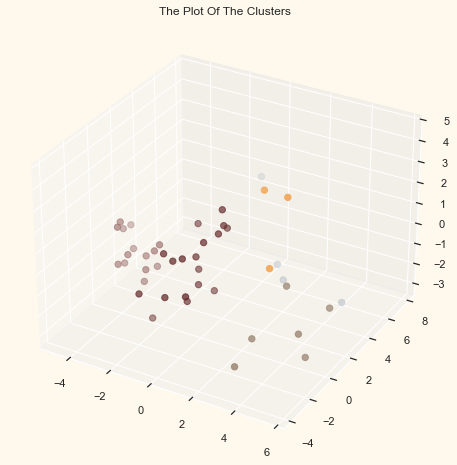

In [29]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

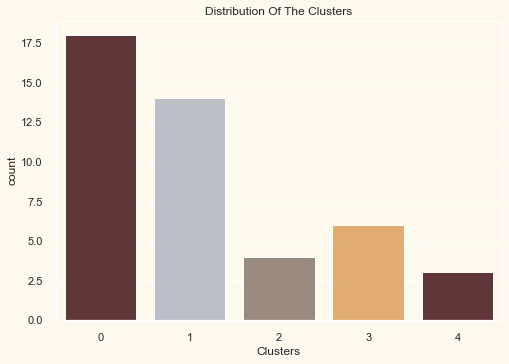

In [30]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=tenserve["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

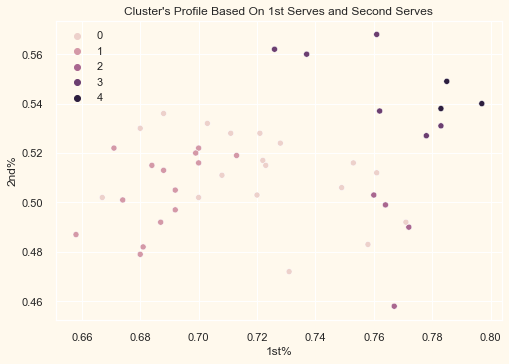

In [31]:
pl = sns.scatterplot(data = tenserve,x=tenserve["1st%"], y=tenserve["2nd%"],hue=tenserve["Clusters"])
pl.set_title("Cluster's Profile Based On 1st Serves and Second Serves")
plt.legend()
plt.show()

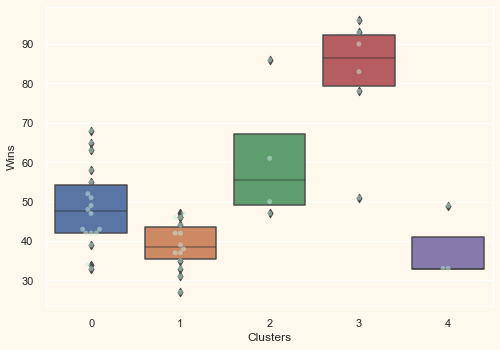

In [32]:
plt.figure()
pl=sns.swarmplot(x=tenserve["Clusters"], y=tenserve["Wins"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=tenserve["Clusters"], y=tenserve["Wins"])
plt.show()

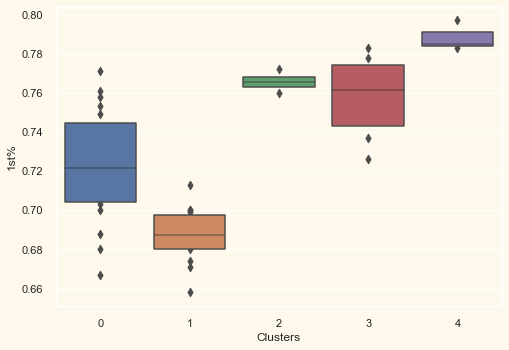

In [33]:
plt.figure()
pl=sns.boxenplot(x=tenserve["Clusters"], y=tenserve["1st%"])
plt.show()

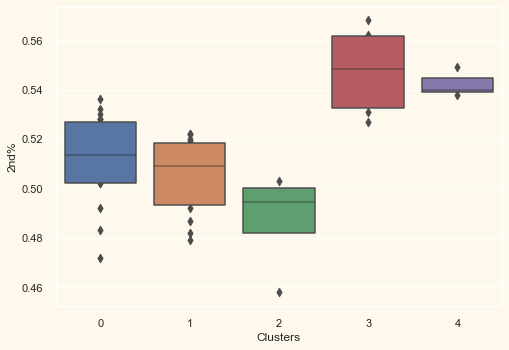

In [34]:
plt.figure()
pl=sns.boxenplot(x=tenserve["Clusters"], y=tenserve["2nd%"])
plt.show()

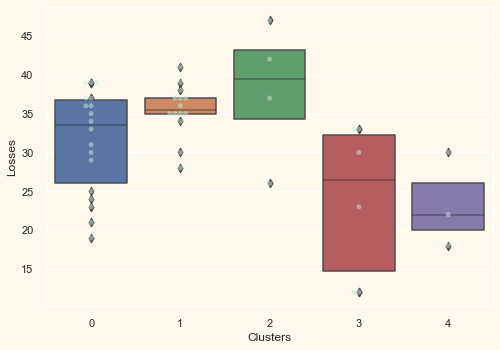

In [35]:
plt.figure()
pl=sns.swarmplot(x=tenserve["Clusters"], y=tenserve["Losses"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=tenserve["Clusters"], y=tenserve["Losses"])
plt.show()

In [36]:
playername = ten[['Player']]

In [37]:
final = pd.concat([playername, tenserve], axis=1, sort=False)

In [38]:
final.head()

,Player,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses,Clusters
0,Novak DjokovicÊ[SRB],1.0,Novak DjokovicÊ[SRB],108.0,0.889,0.683,0.678,725.0,0.086,285.0,...,0.646,0.762,0.537,0.594,0.870,6.1,44.9,96.0,12.0,3.0
1,Daniil MedvedevÊ[RUS],2.0,Daniil MedvedevÊ[RUS],113.0,0.796,0.687,0.673,1016.0,0.126,326.0,...,0.618,0.783,0.531,0.594,0.868,5.9,41.7,90.0,23.0,3.0
2,Alexander ZverevÊ[GER],3.0,Alexander ZverevÊ[GER],112.0,0.768,0.681,0.678,1123.0,0.130,489.0,...,0.678,0.772,0.490,0.594,0.848,6.0,43.1,86.0,26.0,2.0
3,Rafael NadalÊ[ESP],4.0,Rafael NadalÊ[ESP],63.0,0.810,0.674,0.676,273.0,0.056,145.0,...,0.641,0.737,0.560,0.610,0.856,6.1,50.0,51.0,12.0,3.0
4,Stefanos TsitsipasÊ[GRE],5.0,Stefanos TsitsipasÊ[GRE],116.0,0.716,0.691,0.681,781.0,0.089,241.0,...,0.636,0.761,0.568,0.615,0.878,6.0,44.0,83.0,33.0,3.0


In [39]:
final[final['Clusters']==0]

,Player,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses,Clusters
8,Carlos AlcarazÊ[ESP],9.0,Carlos AlcarazÊ[ESP],52.0,0.635,0.625,0.628,163.0,0.039,120.0,...,0.628,0.680,0.530,0.575,0.760,6.4,44.6,33.0,19.0,0.0
10,Cameron NorrieÊ[GBR],11.0,Cameron NorrieÊ[GBR],104.0,0.625,0.633,0.635,516.0,0.065,316.0,...,0.662,0.700,0.502,0.570,0.793,6.2,43.1,65.0,39.0,0.0
11,Jannik SinnerÊ[ITA],12.0,Jannik SinnerÊ[ITA],102.0,0.667,0.639,0.636,429.0,0.053,208.0,...,0.602,0.711,0.528,0.565,0.805,6.5,44.0,68.0,34.0,0.0
12,Taylor FritzÊ[USA],13.0,Taylor FritzÊ[USA],85.0,0.565,0.660,0.637,872.0,0.120,235.0,...,0.595,0.761,0.512,0.557,0.828,6.3,40.7,48.0,37.0,0.0
13,Hubert HurkaczÊ[POL],14.0,Hubert HurkaczÊ[POL],87.0,0.586,0.657,0.634,797.0,0.114,205.0,...,0.622,0.749,0.506,0.549,0.832,6.2,41.1,51.0,36.0,0.0
14,Diego SchwartzmanÊ[ARG],15.0,Diego SchwartzmanÊ[ARG],100.0,0.630,0.606,0.622,142.0,0.018,281.0,...,0.632,0.667,0.502,0.557,0.740,6.4,46.2,63.0,37.0,0.0
17,Pablo Carreno BustaÊ[ESP],18.0,Pablo Carreno BustaÊ[ESP],88.0,0.659,0.649,0.642,346.0,0.054,127.0,...,0.684,0.703,0.532,0.567,0.810,6.2,43.0,58.0,30.0,0.0
18,Roberto Bautista AgutÊ[ESP],19.0,Roberto Bautista AgutÊ[ESP],82.0,0.598,0.637,0.636,275.0,0.042,145.0,...,0.663,0.688,0.536,0.574,0.787,6.2,44.2,49.0,33.0,0.0
20,Gael MonfilsÊ[FRA],21.0,Gael MonfilsÊ[FRA],58.0,0.586,0.636,0.635,468.0,0.100,259.0,...,0.634,0.731,0.472,0.556,0.806,6.4,40.8,34.0,24.0,0.0
21,Grigor DimitrovÊ[BUL],22.0,Grigor DimitrovÊ[BUL],71.0,0.592,0.641,0.652,340.0,0.060,277.0,...,0.634,0.720,0.503,0.580,0.803,6.4,43.1,42.0,29.0,0.0


In [40]:
final[final['Clusters']==1]

,Player,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses,Clusters
19,Nikoloz BasilashviliÊ[GEO],20.0,Nikoloz BasilashviliÊ[GEO],78.0,0.474,0.593,0.602,308.0,0.053,295.0,...,0.566,0.680,0.479,0.543,0.716,6.6,40.2,37.0,41.0,1.0
23,Alex De MinaurÊ[AUS],24.0,Alex De MinaurÊ[AUS],73.0,0.521,0.620,0.623,232.0,0.039,173.0,...,0.610,0.688,0.513,0.554,0.764,6.6,42.5,38.0,35.0,1.0
27,Alejandro Davidovich FokinaÊ[ESP],28.0,Alejandro Davidovich FokinaÊ[ESP],82.0,0.561,0.601,0.612,170.0,0.026,231.0,...,0.668,0.658,0.487,0.545,0.726,6.5,41.8,46.0,36.0,1.0
28,Frances TiafoeÊ[USA],29.0,Frances TiafoeÊ[USA],77.0,0.545,0.637,0.627,485.0,0.072,178.0,...,0.612,0.713,0.519,0.557,0.806,6.5,42.6,42.0,35.0,1.0
29,Cristian GarinÊ[CHI],30.0,Cristian GarinÊ[CHI],69.0,0.565,0.617,0.620,327.0,0.055,226.0,...,0.616,0.692,0.497,0.552,0.760,6.4,43.6,39.0,30.0,1.0
30,Albert RamosÊ[ESP],31.0,Albert RamosÊ[ESP],72.0,0.458,0.615,0.621,193.0,0.032,180.0,...,0.623,0.671,0.522,0.567,0.757,6.5,44.7,33.0,39.0,1.0
33,Tommy PaulÊ[USA],34.0,Tommy PaulÊ[USA],83.0,0.554,0.629,0.626,360.0,0.056,183.0,...,0.600,0.700,0.522,0.562,0.782,6.4,41.3,46.0,37.0,1.0
34,Daniel EvansÊ[GBR],35.0,Daniel EvansÊ[GBR],81.0,0.543,0.630,0.630,321.0,0.047,196.0,...,0.614,0.699,0.520,0.561,0.786,6.5,45.1,44.0,37.0,1.0
35,Federico DelbonisÊ[ARG],36.0,Federico DelbonisÊ[ARG],74.0,0.500,0.607,0.619,249.0,0.042,263.0,...,0.628,0.681,0.482,0.548,0.743,6.5,43.8,37.0,37.0,1.0
37,Miomir KecmanovicÊ[SRB],38.0,Miomir KecmanovicÊ[SRB],69.0,0.449,0.616,0.613,310.0,0.057,171.0,...,0.598,0.684,0.515,0.559,0.745,6.5,40.3,31.0,38.0,1.0


In [41]:
final[final['Clusters']==2]

,Player,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses,Clusters
2,Alexander ZverevÊ[GER],3.0,Alexander ZverevÊ[GER],112.0,0.768,0.681,0.678,1123.0,0.130,489.0,...,0.678,0.772,0.490,0.594,0.848,6.0,43.1,86.0,26.0,2.0
9,Felix Auger AliassimeÊ[CAN],10.0,Felix Auger AliassimeÊ[CAN],103.0,0.592,0.666,0.662,913.0,0.118,425.0,...,0.632,0.760,0.503,0.591,0.834,6.1,45.6,61.0,42.0,2.0
15,Denis ShapovalovÊ[CAN],16.0,Denis ShapovalovÊ[CAN],84.0,0.560,0.658,0.671,735.0,0.105,503.0,...,0.598,0.764,0.499,0.608,0.840,6.3,44.2,47.0,37.0,2.0
31,Alexander BublikÊ[KAZ],32.0,Alexander BublikÊ[KAZ],97.0,0.515,0.635,0.626,1168.0,0.157,586.0,...,0.575,0.767,0.458,0.561,0.806,6.5,37.7,50.0,47.0,2.0


In [42]:
final[final['Clusters']==3]

,Player,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses,Clusters
0,Novak DjokovicÊ[SRB],1.0,Novak DjokovicÊ[SRB],108.0,0.889,0.683,0.678,725.0,0.086,285.0,...,0.646,0.762,0.537,0.594,0.870,6.1,44.9,96.0,12.0,3.0
1,Daniil MedvedevÊ[RUS],2.0,Daniil MedvedevÊ[RUS],113.0,0.796,0.687,0.673,1016.0,0.126,326.0,...,0.618,0.783,0.531,0.594,0.868,5.9,41.7,90.0,23.0,3.0
3,Rafael NadalÊ[ESP],4.0,Rafael NadalÊ[ESP],63.0,0.810,0.674,0.676,273.0,0.056,145.0,...,0.641,0.737,0.560,0.610,0.856,6.1,50.0,51.0,12.0,3.0
4,Stefanos TsitsipasÊ[GRE],5.0,Stefanos TsitsipasÊ[GRE],116.0,0.716,0.691,0.681,781.0,0.089,241.0,...,0.636,0.761,0.568,0.615,0.878,6.0,44.0,83.0,33.0,3.0
6,Casper RuudÊ[NOR],7.0,Casper RuudÊ[NOR],108.0,0.722,0.669,0.664,505.0,0.065,197.0,...,0.651,0.726,0.562,0.606,0.849,6.1,44.0,78.0,30.0,3.0
7,Andrey RublevÊ[RUS],8.0,Andrey RublevÊ[RUS],126.0,0.738,0.679,0.659,973.0,0.104,219.0,...,0.604,0.778,0.527,0.560,0.860,6.0,40.1,93.0,33.0,3.0


In [44]:
final[final['Clusters']==4]

,Player,Rk,Player,M,M W%,SPW,SPW-InP,Aces,Ace%,DFs,...,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,Sec/Pt,Wins,Losses,Clusters
5,Matteo BerrettiniÊ[ITA],6.0,Matteo BerrettiniÊ[ITA],67.0,0.731,0.703,0.674,759.0,0.133,119.0,...,0.635,0.797,0.540,0.573,0.902,6.1,43.0,49.0,18.0,4.0
16,Reilly OpelkaÊ[USA],17.0,Reilly OpelkaÊ[USA],63.0,0.524,0.699,0.640,1124.0,0.216,156.0,...,0.655,0.783,0.538,0.590,0.892,6.2,40.5,33.0,30.0,4.0
24,John IsnerÊ[USA],25.0,John IsnerÊ[USA],55.0,0.600,0.713,0.648,1124.0,0.239,139.0,...,0.697,0.785,0.549,0.609,0.915,6.1,40.4,33.0,22.0,4.0
